## Task 28

### Instantiating A Small Covnet

In [1]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1))) #(28, 28, 1) is the format of MNIST images.
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

### Adding A Classifier To The Covnet

In [2]:
model.add(layers.Flatten()) #Flattening the 3D tensor into 1D tensor.
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax')) #10 is the number of classes in MNIST dataset.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

### Training The Covnet on MNIST Images

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_img, train_label), (test_img, test_label) = mnist.load_data()

train_img = train_img.reshape((60000, 28, 28, 1)) #Reshaping the training images into (60000, 28, 28, 1) format.
train_img = train_img.astype('float32') / 255 #Normalizing the training images.

test_img=test_img.reshape((10000,28,28,1)) #Reshaping the test images into (10000, 28, 28, 1) format.
test_img=test_img.astype('float32') / 255 #Normalizing the test images.

train_labels = to_categorical(train_label) #One-hot encoding the training labels.
test_labels = to_categorical(test_label) #One-hot encoding the test labels.

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_img, train_labels, epochs=5, batch_size=64)

test_loss, test_acc = model.evaluate(test_img, test_labels)
print(test_acc)

Epoch 1/5
938/938 [==============================] - 30s 32ms/step - loss: 0.1789 - accuracy: 0.9441
Epoch 2/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0460 - accuracy: 0.9858
Epoch 3/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0325 - accuracy: 0.9905
Epoch 4/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0244 - accuracy: 0.9924
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0366 - accuracy: 0.9900
0.9900000095367432


### Copying Images to Train, Validation, and Test Directories

In [3]:
import os, shutil

original_dataset='dogs-vs-cats/train/train'

base_dir='cats_and_dogs_small'
os.mkdir(base_dir)

train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)

validation_dir=os.path.join(base_dir,'validation')
os.mkdir(validation_dir)

test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_cats_dir=os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

train_dogs_dir=os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir=os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir=os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir=os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)

test_dogs_dir=os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset,fname)
    dst=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)

fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset,fname)
    dst=os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)

fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset,fname)
    dst=os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset,fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)

fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset,fname)
    dst=os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)

fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset,fname)
    dst=os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

print('total training cat images:',len(os.listdir(train_cats_dir)))
print('total training dog images:',len(os.listdir(train_dogs_dir)))
print('total validation cat images:',len(os.listdir(validation_cats_dir)))
print('total validation dog images:',len(os.listdir(validation_dogs_dir)))
print('total test cat images:',len(os.listdir(test_cats_dir)))
print('total test dog images:',len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


### Instantiating A Small Convnet For Dogs vs. Cats Classification

In [5]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

### Configuring The Model For Training

In [7]:
from keras import optimizers

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

### Using `ImageDataGenerator` To Read Images From Directories

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')

validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


### Fitting The Model Using A Batch Generator

In [10]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)


C:\Users\abdul\AppData\Local\Temp\ipykernel_5348\3697243963.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)


Epoch 1/30
100/100 [==============================] - 85s 839ms/step - loss: 0.6916 - acc: 0.5315 - val_loss: 0.6858 - val_acc: 0.5280
Epoch 2/30
100/100 [==============================] - 79s 787ms/step - loss: 0.6679 - acc: 0.5770 - val_loss: 0.6523 - val_acc: 0.6370
Epoch 3/30
100/100 [==============================] - 71s 712ms/step - loss: 0.6230 - acc: 0.6580 - val_loss: 0.6391 - val_acc: 0.6280
Epoch 4/30
100/100 [==============================] - 71s 714ms/step - loss: 0.5731 - acc: 0.6935 - val_loss: 0.5861 - val_acc: 0.6790
Epoch 5/30
100/100 [==============================] - 71s 711ms/step - loss: 0.5368 - acc: 0.7270 - val_loss: 0.6427 - val_acc: 0.6660
Epoch 6/30
100/100 [==============================] - 72s 716ms/step - loss: 0.5047 - acc: 0.7525 - val_loss: 0.5724 - val_acc: 0.7010
Epoch 7/30
100/100 [==============================] - 70s 699ms/step - loss: 0.4707 - acc: 0.7700 - val_loss: 0.5580 - val_acc: 0.7020
Epoch 8/30
100/100 [==============================] - 7

### Saving The Model

In [11]:
model.save('cats_and_dogs_small_1.h5')

### Displaying Some Curves

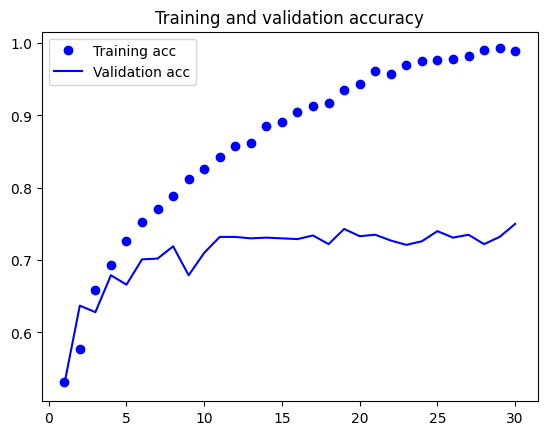

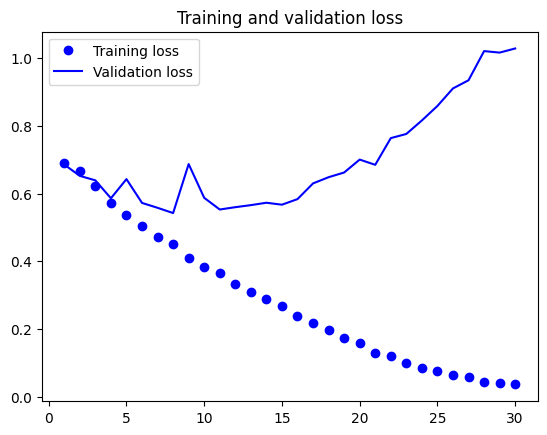

In [12]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()